In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating new project at `~/Documents/eth_courses/notebooks/math/julia/geometry`
  No Changes to `~/Documents/eth_courses/notebooks/math/julia/geometry/Project.toml`
  No Changes to `~/Documents/eth_courses/notebooks/math/julia/geometry/Manifest.toml`


In [141]:
using GLMakie
using LinearAlgebra

GLMakie.activate!(inline=true)

# Monomial basis

In [31]:
t = 0:0.1:10

monomial(t) = [1; t; t^2]

monomial (generic function with 1 method)

In [32]:
monomial(2)

3-element Vector{Int64}:
 1
 2
 4

In [85]:
function get_curve(t, M, basis )
    return sum(M * basis(t))
end

get_curve (generic function with 2 methods)

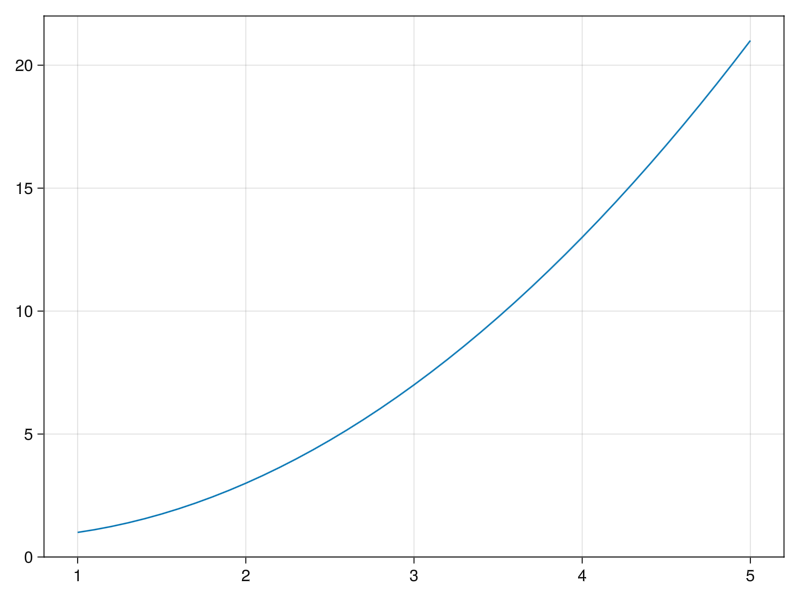

In [77]:
let

t_range = 1:0.1:5
p = [1;-1;1]

curve = [get_curve(t, diagm(p), monomial ) for t in t_range]

lines(t_range, curve)

end

# Bezier Cuve

In [87]:
function bezier_curve(t, P)

    # change of basis from monomial to bernstein
    M = [1 -3 3 1;
        0 3 -6 3;
        0 0 3 -3;
        0 0 0 1 ]

    # monomial basis vectors
    t_mat = [ 1; t; t^2; t^3 ]

    curve = P * M * t_mat
    
end

bezier_curve (generic function with 1 method)

In [111]:
let

p1 = [0 0]
p2 = [0 1]
p3 = [1 2]
p4 = [2 2]

P = vcat(p1, p2, p3, p4)'

bezier_curve(0.2, P)

end

2-element Vector{Float64}:
 0.11200000000000002
 0.5920000000000001

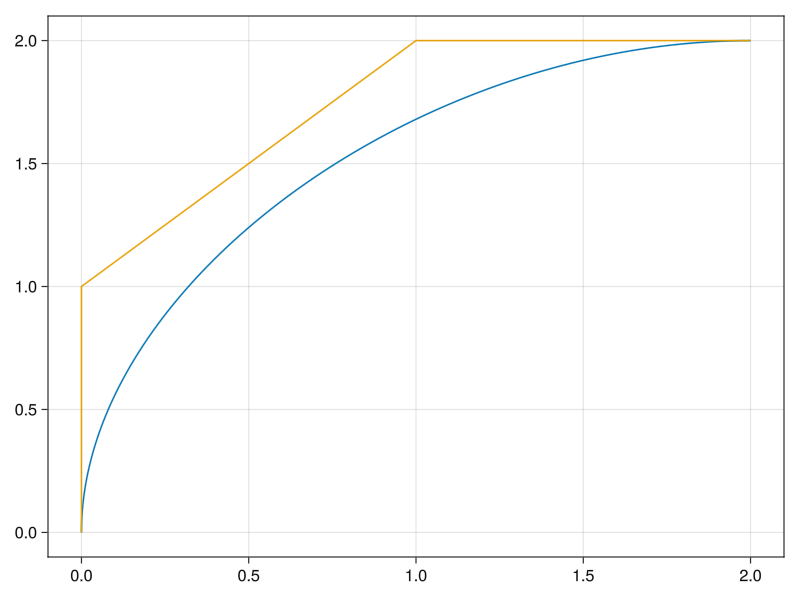

GLMakie.Screen(...)

In [147]:
let

p1 = [0 0]
p2 = [0 1]
p3 = [1 2]
p4 = [2 2]

P = vcat(p1, p2, p3, p4)'

t_range = 0:0.01:1
curve = [bezier_curve(t, P) for t in t_range]

# plot curve
fig = lines(Point2f.(curve))

# plot the control points
lines!(P)

display(fig)
end